In [469]:
import pandas as pd
import os


In [470]:
# pwd = os.getcwd()
# filepath = os.path.join(pwd, "wine.csv")

In [471]:
#data_import = pd.read_csv(filepath)
# data_import

## Vi gör en binär classifier där alla viner som får poängen över 5 är 1 och alla under är 0 

In [472]:
Wines = pd.read_csv(r'C:\Users\Bananberg\datasets\winequalityN.csv')
Wines.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


<Axes: >

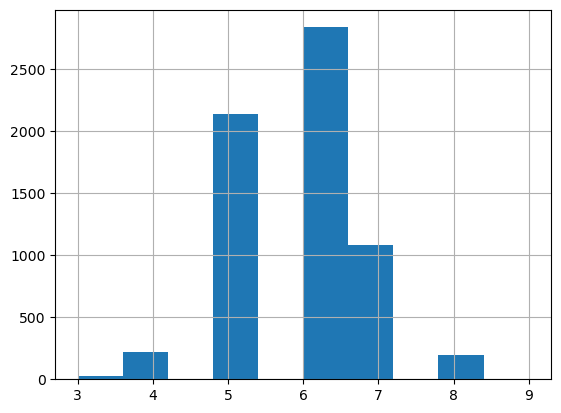

In [473]:
Wines["quality"].hist()

## Låt oss skapa två classifiseringar, 
#### X = vad vi ska använda för att klassififsera 
#### Y = vad vi faktiskt ska klassififisera.

In [474]:
y = Wines["quality"] > 5 # skapar en variable som sätter true på alla åvan 5  
y.head(20)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13     True
14    False
15     True
16     True
17     True
18     True
19    False
Name: quality, dtype: bool

In [475]:
# X = Wines.iloc[:,:-1] # tar bort endast kolumnen med "quality" 
# X = Wines.drop(['type', 'quality'], axis=1)

In [476]:
sample_incomplete_rows = Wines[Wines.isnull().any(axis=1)].head()
sample_incomplete_rows.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
33,white,6.2,0.12,0.34,NaN,0.045,43.0,117.0,0.9939,3.42,0.51,9.0,6
54,white,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.9930,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,6
98,white,9.8,0.36,0.46,10.5,NaN,4.0,83.0,0.9956,2.89,0.30,10.1,4


## Vi behöver faktiskt ta bort Nan från några columner i X

In [477]:
#median = Wines["fixed acidity"].median()  
#Wines["fixed acidity"].fillna(median, inplace=True)
# X = Wines.fillna({'fixed acidity':'.', 'volatile acidity':'.', 'residual sugar':'.', 'chlorides':'.', 'pH':'.'}).fillna(0)
fill_nan = Wines.fillna(Wines.median())

C:\Users\Bananberg\AppData\Local\Temp\ipykernel_22092\581303460.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fill_nan = Wines.fillna(Wines.median())


In [478]:
sample_incomplete_rows = fill_nan[fill_nan.isnull().any(axis=1)].head()
sample_incomplete_rows.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [479]:
fill_nan.head(20) # tittar så de fylldes bra 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [480]:
X = fill_nan.drop(['type', 'quality'], axis=1)

In [481]:
X.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [482]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#### Gött att se att vi har gjort en split som fick med alla datapunkter i alla fall

In [483]:
print(len(X_train))
print(len(X_test))
print(len(X_train) + len(X_test)) 

5197
1300
6497


### Då scalar vi lite eftersom datan är så utspridd. 

In [484]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

scaled_X_trained = scaler.fit_transform(X_train)
scaled_X_trained

array([[-0.47888897, -0.54322164,  0.27961632, ..., -0.86015915,
        -0.75102378, -1.08506915],
       [ 0.97495289, -1.08668148,  0.21067728, ..., -1.60627806,
        -1.14835027, -0.41405807],
       [-0.93799692, -0.36206836,  0.14173824, ..., -0.17621681,
        -1.0159081 , -0.24630531],
       ...,
       [ 4.72433453, -0.42245279,  2.07203138, ..., -0.36274654,
         0.90450327, -0.66568723],
       [ 1.28102486,  0.36254475,  1.31370194, ...,  0.63207867,
         2.42758815,  2.43773898],
       [ 0.66888092, -0.42245279,  0.21067728, ...,  0.01031291,
         0.63961894, -0.07855254]])

In [485]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[-0.172817  , -0.54322164,  0.90006769, ..., -0.36274654,
        -0.35369728,  1.17959322],
       [ 0.28629096, -1.20745033,  2.89929987, ..., -0.92233573,
        -0.88346594,  0.256953  ],
       [-0.78496094, -1.1470659 , -0.34083504, ..., -0.61145285,
        -1.0159081 , -1.16894553],
       ...,
       [ 0.51584494, -0.12053066,  1.31370194, ..., -1.10886545,
         3.61956762, -1.08506915],
       [ 0.20977297,  1.14754228, -1.7885549 , ...,  1.00513813,
         0.37473461,  0.17307661],
       [ 0.05673698,  1.02677343, -0.96128641, ...,  1.87561019,
         1.30182976, -0.83343999]])

## Allt funkar då tar vi och "pipelinear" detta lite / preporcessing i en och samma funktion så vi kan återanvända den flera gånger. 

In [486]:
def preprocessing_function(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
    scaled_X_trained = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    return scaled_X_trained, scaled_x_test, y_train, y_test

#### Nu gör vi en support vector machine.

In [487]:
from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(scaled_X_trained, y_train) # vad vi gjorde här är att vi ber modellen lära sig av y och X 
# För att försöka förutse utkomsten.

SVC()

In [488]:
svc_clf_predictions = svc_clf.predict(scaled_X_test)
svc_clf_predictions

array([ True,  True,  True, ..., False,  True,  True])

In [489]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

    # y = what we want to predict  svc_clf... What 
confusion_matrix(y_test, svc_clf_predictions)

array([[310, 158],
       [112, 720]], dtype=int64)

In [490]:
accuracy_score(y_test, svc_clf_predictions)

0.7923076923076923

In [491]:
precision_score(y_test, svc_clf_predictions)

0.8200455580865603

In [492]:
recall_score(y_test, svc_clf_predictions)

0.8653846153846154

## Nu kan vi anväda grid search för att se om vi ytterligare kan förbättra våra poäng. 

In [493]:
# Vi börjar med en funktion. 

def algo_accuracy(y_test, predictions):
    conf_matrix = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    return conf_matrix, accuracy, precision, recall 

In [494]:
# detta är en function som Shashank använt i tidigare exempel. 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3x4) combinations of hyperparameters 
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]
rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12x6)*5=90 rounds of training 
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(scaled_X_trained, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [495]:
rfc_clf = grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=2, n_estimators=30)

In [496]:
rfc_predictions = rfc_clf.predict(scaled_X_test)
rfc_predictions

array([1., 1., 1., ..., 0., 1., 1.])

### Ta en titt på dina gamla resulata och se att vi gjorde bättre ifrån oss med hjälpa av gridsearch 

In [497]:
algo_accuracy(y_test, rfc_predictions)

(array([[359, 109],
        [ 96, 736]], dtype=int64),
 0.8423076923076923,
 0.8710059171597633,
 0.8846153846153846)